# Métaheuristique 1 : Algortihme Génétique

In [ ]:
import random

# Paramètres de l'algorithme génétique
population_size = 500
num_generations = 50
mutation_rate = 0.01

# Fonction pour charger les données depuis un fichier

def load_knapsack_data(file_path):
    weights = []
    profits = []
    max_capacity = 0
    
    with open(file_path, "r") as file:
        lines = file.readlines()
    
    for line in lines:
        parts = line.strip().split()
        if not parts:
            continue

        if parts[0] == "MAX_CAPACITY:":
            max_capacity = int(parts[1])
        elif parts[0].isdigit():  # Ligne contenant les données des objets
            _, profit, weight = map(int, parts)  # Ignorer l'ID et extraire profit et poids
            profits.append(profit)
            weights.append(weight)
    
    return weights, profits, max_capacity

# Charger les données depuis le fichier
file_path = "Data/pi-13-100-100-001.kna"
weights, profits, max_capacity = load_knapsack_data(file_path)

# Classe représentant une solution pour le problème du sac à dos
class KnapsackSolution:
    def __init__(self, weights, profits, max_capacity, chromosome=None):
        self.weights = weights
        self.profits = profits
        self.capacity = max_capacity
        self.num_items = len(weights)

        # Générer un chromosome valide dès l'initialisation
        if chromosome is None:
            self.chromosome = self.generate_valid_chromosome()
        else:
            self.chromosome = chromosome

        self.total_weight = sum(w for w, c in zip(self.weights, self.chromosome) if c)
        self.total_profit = sum(p for p, c in zip(self.profits, self.chromosome) if c)

        # Correction des solutions non valides
        self.correct_solution()

    def generate_valid_chromosome(self):
        """Génère un chromosome qui respecte la contrainte de poids."""
        chromosome = [False] * self.num_items
        indices = list(range(self.num_items))
        random.shuffle(indices)
        current_weight = 0

        for i in indices:
            if current_weight + self.weights[i] <= self.capacity:
                chromosome[i] = True
                current_weight += self.weights[i]

        return chromosome

    def correct_solution(self):
        """Si la solution dépasse la capacité, retire des objets au hasard."""
        while self.total_weight > self.capacity:
            indices = [i for i, c in enumerate(self.chromosome) if c]
            if not indices:
                break
            remove_idx = random.choice(indices)
            self.chromosome[remove_idx] = False
            self.total_weight -= self.weights[remove_idx]
            self.total_profit -= self.profits[remove_idx]

    def __lt__(self, other):
        return self.total_profit > other.total_profit  # Tri en ordre décroissant de profit

# Sélection par tournoi
def tournament_selection(population, k=5):
    selected = random.sample(population, k)
    return max(selected, key=lambda x: x.total_profit)

# Croisement (one-point crossover)
def crossover(parent1, parent2, max_capacity):
    point = random.randint(1, len(parent1.chromosome) - 1)
    child1 = parent1.chromosome[:point] + parent2.chromosome[point:]
    child2 = parent2.chromosome[:point] + parent1.chromosome[point:]
    return KnapsackSolution(weights, profits, max_capacity, child1), KnapsackSolution(weights, profits, max_capacity, child2)

# Mutation (bit-flip mutation)
def mutate(solution, max_capacity):
    new_chromosome = solution.chromosome[:]
    for i in range(len(new_chromosome)):
        if random.random() < mutation_rate:
            new_chromosome[i] = not new_chromosome[i]  # Inverser le bit
    return KnapsackSolution(weights, profits, max_capacity, new_chromosome)

# Initialisation de la population
population = [KnapsackSolution(weights, profits, max_capacity) for _ in range(population_size)]

# Boucle principale de l'algorithme génétique
for generation in range(num_generations):
    population.sort()  # Trier les solutions par profit décroissant

    # Affichage du meilleur individu de la génération actuelle
    best_solution = population[0]
    print(f"Gen {generation}: Best Profit = {best_solution.total_profit}, Weight = {best_solution.total_weight}")

    # Nouvelle génération
    new_population = population[:10]  # Garder les 10 meilleures solutions (élitisme)
    
    while len(new_population) < population_size:
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)
        child1, child2 = crossover(parent1, parent2, max_capacity)
        new_population.append(mutate(child1, max_capacity))
        if len(new_population) < population_size:
            new_population.append(mutate(child2, max_capacity))

    population = new_population

# Affichage du meilleur résultat final
best_solution = max(population, key=lambda x: x.total_profit)
print(f"\nFinal Best Solution: Profit = {best_solution.total_profit}, Weight = {best_solution.total_weight}")


Gen 0: Best Profit = 1989, Weight = 969
Gen 1: Best Profit = 1989, Weight = 969
Gen 2: Best Profit = 1989, Weight = 969
Gen 3: Best Profit = 1989, Weight = 969
Gen 4: Best Profit = 1989, Weight = 969
Gen 5: Best Profit = 1989, Weight = 969
Gen 6: Best Profit = 1989, Weight = 969
Gen 7: Best Profit = 1989, Weight = 969
Gen 8: Best Profit = 1989, Weight = 969
Gen 9: Best Profit = 1989, Weight = 969
Gen 10: Best Profit = 1989, Weight = 969
Gen 11: Best Profit = 1989, Weight = 969
Gen 12: Best Profit = 1989, Weight = 969
Gen 13: Best Profit = 1989, Weight = 969
Gen 14: Best Profit = 1989, Weight = 969
Gen 15: Best Profit = 1989, Weight = 969
Gen 16: Best Profit = 1989, Weight = 969
Gen 17: Best Profit = 1989, Weight = 969
Gen 18: Best Profit = 1989, Weight = 969
Gen 19: Best Profit = 1989, Weight = 969
Gen 20: Best Profit = 1989, Weight = 969
Gen 21: Best Profit = 1989, Weight = 969
Gen 22: Best Profit = 1989, Weight = 969
Gen 23: Best Profit = 1989, Weight = 969
Gen 24: Best Profit = 1989

# Métaheuristique 2 : Méthode Tabou

,Best Value,Total Weight,Execution Time (s)
Résultat Tabou,0,0,0.0


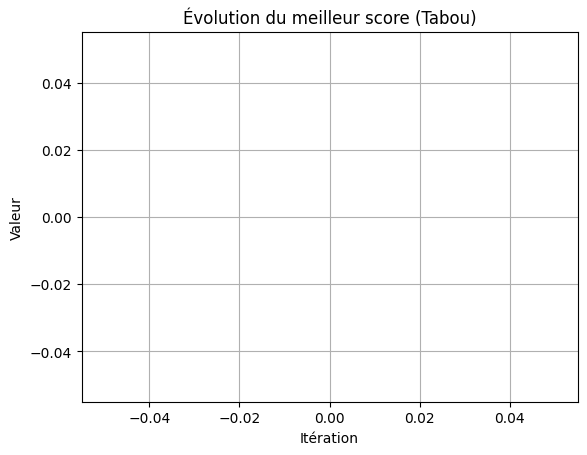

In [ ]:
# Réimportation des modules nécessaires après le reset
import os
import glob
import random
import time
import numpy as npµ
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parser adapté au format réel du fichier .kna
def parse_kna_file(file_path):
    with open(file_path, "r") as f:
        lines = [line.strip() for line in f if line.strip()]

    values = []
    weights = []
    capacity = 0
    data_start = None

    for idx, line in enumerate(lines):
        if line.startswith("NB_ITEMS:"):
            n_items = int(line.split(":")[1].strip())
        if line.startswith("MAX_CAPACITY:"):
            capacity = int(line.split(":")[1].strip())
        if line.startswith("DATA [id profit weight]:"):
            data_start = idx + 1

    if data_start is None:
        print(f"[ERREUR] Section DATA non trouvée dans {file_path}")
        return 0, 0, [], []

    for line in lines[data_start:]:
        parts = line.split()
        if len(parts) == 3:
            _, val, wt = parts
            values.append(int(val))
            weights.append(int(wt))

    return len(values), capacity, values, weights

# Algorithme Tabou configurable
def tabu_search_configurable(values, weights, capacity, max_iterations=100, tabu_list_size=10):
    n = len(values)

    def evaluate(solution):
        total_weight = sum(w for w, s in zip(weights, solution) if s)
        if total_weight > capacity:
            return 0
        return sum(v for v, s in zip(values, solution) if s)

    def generate_neighbors(solution):
        neighbors = []
        for i in range(len(solution)):
            neighbor = solution.copy()
            neighbor[i] = 1 - neighbor[i]
            neighbors.append(neighbor)
        return neighbors

    current_solution = [0] * n
    best_solution = current_solution.copy()
    best_value = evaluate(best_solution)

    tabu_list = []
    history = []

    for _ in range(max_iterations):
        neighbors = generate_neighbors(current_solution)
        best_candidate = None
        best_candidate_value = 0

        for neighbor in neighbors:
            if neighbor in tabu_list:
                continue
            val = evaluate(neighbor)
            if val > best_candidate_value:
                best_candidate = neighbor
                best_candidate_value = val

        if best_candidate is None:
            break

        current_solution = best_candidate
        if best_candidate_value > best_value:
            best_solution = best_candidate.copy()
            best_value = best_candidate_value

        tabu_list.append(current_solution)
        if len(tabu_list) > tabu_list_size:
            tabu_list.pop(0)

        history.append(best_value)

    return best_solution, best_value, history

# Les tests et graphes

# Automatisation des tests (Algorithme Génétique)

In [8]:
import os
import glob
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns

def parse_kna_file(file_path):
    with open(file_path, "r") as f:
        lines = [line.strip() for line in f if line.strip()]

    values = []
    weights = []
    capacity = 0
    data_start = None

    for idx, line in enumerate(lines):
        if line.startswith("NB_ITEMS:"):
            n_items = int(line.split(":")[1].strip())
        if line.startswith("MAX_CAPACITY:"):
            capacity = int(line.split(":")[1].strip())
        if line.startswith("DATA [id profit weight]:"):
            data_start = idx + 1

    if data_start is None:
        print(f"[ERREUR] Section DATA non trouvée dans {file_path}")
        return 0, 0, [], []

    for line in lines[data_start:]:
        parts = line.split()
        if len(parts) == 3:
            _, val, wt = parts
            values.append(int(val))
            weights.append(int(wt))

    return len(values), capacity, values, weights



# Nouvelle version : génération d’individus valides dès le départ
def generate_valid_individual(weights, capacity):
    n = len(weights)
    individual = [0] * n
    indices = list(range(n))
    random.shuffle(indices)
    total_weight = 0
    for i in indices:
        if total_weight + weights[i] <= capacity:
            individual[i] = 1
            total_weight += weights[i]
    return individual

# Remplace la fonction generate_individual dans l'algo génétique configurable
def genetic_algorithm_configurable(values, weights, capacity, population_size, generations, mutation_rate, crossover_type="one_point", mutation_type="flip_bit"):
    num_items = len(values)

    def fitness(individual):
        total_value = sum(v for v, selected in zip(values, individual) if selected)
        total_weight = sum(w for w, selected in zip(weights, individual) if selected)
        return total_value if total_weight <= capacity else 0

    def crossover(p1, p2):
        if crossover_type == "uniform":
            return [random.choice([g1, g2]) for g1, g2 in zip(p1, p2)]
        else:  # default to one_point
            point = random.randint(1, num_items - 1)
            return p1[:point] + p2[point:]

    def mutate(individual):
        if mutation_type == "flip_bit":
            return [1 - g if random.random() < mutation_rate else g for g in individual]
        elif mutation_type == "swap":
            i, j = random.sample(range(num_items), 2)
            individual[i], individual[j] = individual[j], individual[i]
            return individual
        else:
            return individual

    population = [generate_valid_individual(weights, capacity) for _ in range(population_size)]
    best_individual = max(population, key=fitness)
    best_fitness = fitness(best_individual)
    history = [best_fitness]

    for _ in range(generations):
        scored_pop = [(ind, fitness(ind)) for ind in population]
        valid = [(ind, f) for ind, f in scored_pop if f > 0]
        if not valid:
            population = [generate_valid_individual(weights, capacity) for _ in range(population_size)]
            continue
        parents = random.choices([i for i, _ in valid], weights=[f for _, f in valid], k=population_size)
        next_gen = []
        for i in range(0, population_size, 2):
            p1 = parents[i]
            p2 = parents[i+1 if i+1 < population_size else 0]
            child1 = mutate(crossover(p1, p2))
            child2 = mutate(crossover(p2, p1))
            next_gen.extend([child1, child2])
        population = next_gen[:population_size]
        gen_best = max(population, key=fitness)
        gen_fitness = fitness(gen_best)
        if gen_fitness > best_fitness:
            best_individual = gen_best
            best_fitness = gen_fitness
        history.append(best_fitness)

    return best_individual, best_fitness, history


# Benchmark complet pour chaque fichier de Data/
def run_benchmark_on_all_datasets(data_folder="Data", output_folder="Results"):
    os.makedirs(output_folder, exist_ok=True)
    kna_files = glob.glob(os.path.join(data_folder, "*.kna"))
    config = {
        "population_sizes": [30, 50],
        "generations_list": [100, 200],
        "mutation_rates": [0.01, 0.05],
        "crossover_types": ["one_point", "uniform"],
        "mutation_types": ["flip_bit"]
    }

    for file_path in kna_files:
        name = os.path.basename(file_path)
        n, capacity, values, weights = parse_kna_file(file_path)
        print(f"\nDataset: {name}")
        print(f"Nombre d'objets : {n}")
        print(f"Capacité max : {capacity}")
        print(f"Valeurs (extrait) : {values[:5]}")
        print(f"Poids (extrait) : {weights[:5]}")


        results = []
        for pop_size in config["population_sizes"]:
            for gen in config["generations_list"]:
                for m_rate in config["mutation_rates"]:
                    for cross in config["crossover_types"]:
                        for mut in config["mutation_types"]:
                            start = time.time()
                            sol, val, hist = genetic_algorithm_configurable(
                                values, weights, capacity,
                                pop_size, gen, m_rate,
                                crossover_type=cross,
                                mutation_type=mut
                            )
                            duration = round(time.time() - start, 4)
                            results.append({
                                "Dataset": name,
                                "Population": pop_size,
                                "Generations": gen,
                                "Mutation Rate": m_rate,
                                "Crossover": cross,
                                "Mutation": mut,
                                "Best Value": val,
                                "Time (s)": duration
                            })

        df = pd.DataFrame(results)
        df.to_excel(f"{output_folder}/{name.replace('.kna', '')}.xlsx", index=False)



        # Graphique
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df, x="Generations", y="Best Value", hue="Mutation Rate", style="Crossover", markers=True)
        plt.title(f"Résultats GA - {name}")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{output_folder}/{name.replace('.kna', '')}.png")
        plt.close()



In [ ]:
run_benchmark_on_all_datasets()

# Automatisation des tests (Méthode Tabou)

In [ ]:
# Réimportation des modules nécessaires après le reset
import os
import glob
import random
import time
import numpy as npµ
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parser adapté au format réel du fichier .kna
def parse_kna_file(file_path):
    with open(file_path, "r") as f:
        lines = [line.strip() for line in f if line.strip()]

    values = []
    weights = []
    capacity = 0
    data_start = None

    for idx, line in enumerate(lines):
        if line.startswith("NB_ITEMS:"):
            n_items = int(line.split(":")[1].strip())
        if line.startswith("MAX_CAPACITY:"):
            capacity = int(line.split(":")[1].strip())
        if line.startswith("DATA [id profit weight]:"):
            data_start = idx + 1

    if data_start is None:
        print(f"[ERREUR] Section DATA non trouvée dans {file_path}")
        return 0, 0, [], []

    for line in lines[data_start:]:
        parts = line.split()
        if len(parts) == 3:
            _, val, wt = parts
            values.append(int(val))
            weights.append(int(wt))

    return len(values), capacity, values, weights

# Algorithme Tabou configurable
def tabu_search_configurable(values, weights, capacity, max_iterations=100, tabu_list_size=10):
    n = len(values)

    def evaluate(solution):
        total_weight = sum(w for w, s in zip(weights, solution) if s)
        if total_weight > capacity:
            return 0
        return sum(v for v, s in zip(values, solution) if s)

    def generate_neighbors(solution):
        neighbors = []
        for i in range(len(solution)):
            neighbor = solution.copy()
            neighbor[i] = 1 - neighbor[i]
            neighbors.append(neighbor)
        return neighbors

    current_solution = [0] * n
    best_solution = current_solution.copy()
    best_value = evaluate(best_solution)

    tabu_list = []
    history = []

    for _ in range(max_iterations):
        neighbors = generate_neighbors(current_solution)
        best_candidate = None
        best_candidate_value = 0

        for neighbor in neighbors:
            if neighbor in tabu_list:
                continue
            val = evaluate(neighbor)
            if val > best_candidate_value:
                best_candidate = neighbor
                best_candidate_value = val

        if best_candidate is None:
            break

        current_solution = best_candidate
        if best_candidate_value > best_value:
            best_solution = best_candidate.copy()
            best_value = best_candidate_value

        tabu_list.append(current_solution)
        if len(tabu_list) > tabu_list_size:
            tabu_list.pop(0)

        history.append(best_value)

    return best_solution, best_value, history

# Benchmark Tabou sur tous les fichiers
def run_tabu_benchmark_on_all_datasets(data_folder="Data", output_folder="ResultsTabu"):
    os.makedirs(output_folder, exist_ok=True)
    kna_files = glob.glob(os.path.join(data_folder, "*.kna"))

    config = {
        "tabu_sizes": [1, 5, 10, 15, 20],
        "iterations_list": [10, 50, 100, 200]
    }

    for file_path in kna_files:
        name = os.path.basename(file_path)
        n, capacity, values, weights = parse_kna_file(file_path)
        print(f"\nDataset: {name}")
        print(f"Nombre d'objets : {n}")
        print(f"Capacité max : {capacity}")
        print(f"Valeurs (extrait) : {values[:5]}")
        print(f"Poids (extrait) : {weights[:5]}")

        if n == 0:
            print(f"[ERREUR] Fichier vide ou mal lu : {name}")
            continue

        results = []

        for tabu_size in config["tabu_sizes"]:
            for iterations in config["iterations_list"]:
                start = time.time()
                sol, val, hist = tabu_search_configurable(
                    values, weights, capacity,
                    max_iterations=iterations,
                    tabu_list_size=tabu_size
                )
                duration = round(time.time() - start, 4)

                results.append({
                    "Dataset": name,
                    "Tabu List Size": tabu_size,
                    "Iterations": iterations,
                    "Best Value": val,
                    "Execution Time (s)": duration
                })

        df = pd.DataFrame(results)
        df.to_excel(f"{output_folder}/{name.replace('.kna', '')}.xlsx", index=False)

        # Graphe
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df, x="Iterations", y="Best Value", hue="Tabu List Size", markers=True, dashes=False)
        plt.title(f"Résultats Tabou - {name}")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{output_folder}/{name.replace('.kna', '')}.png")
        plt.close()


In [7]:
run_tabu_benchmark_on_all_datasets()


Dataset: pi-12-100-1000-001.kna
Nombre d'objets : 100
Capacité max : 970
Valeurs (extrait) : [582, 194, 679, 485, 312]
Poids (extrait) : [582, 194, 679, 485, 396]

Dataset: pi-12-1000-1000-001.kna
Nombre d'objets : 1000
Capacité max : 4556
Valeurs (extrait) : [582, 194, 679, 485, 312]
Poids (extrait) : [582, 194, 679, 485, 396]

Dataset: pi-12-10000-1000-001.kna
Nombre d'objets : 10000
Capacité max : 45132
Valeurs (extrait) : [582, 194, 679, 485, 312]
Poids (extrait) : [582, 194, 679, 485, 396]

Dataset: pi-13-100-1000-001.kna
Nombre d'objets : 110
Capacité max : 970
Valeurs (extrait) : [234, 39, 1053, 351, 585]
Poids (extrait) : [114, 19, 873, 291, 485]

Dataset: pi-13-1000-1000-001.kna
Nombre d'objets : 1000
Capacité max : 3177
Valeurs (extrait) : [234, 39, 1053, 351, 585]
Poids (extrait) : [114, 19, 873, 291, 485]

Dataset: pi-13-10000-1000-001.kna
Nombre d'objets : 10000
Capacité max : 31234
Valeurs (extrait) : [234, 39, 1053, 351, 585]
Poids (extrait) : [114, 19, 873, 291, 485]

